Yichuan Philip Ma

CS506 Project

BPDA Brazilian Census Team 2

Visualizations for Brazilians in Massachusetts and the US by Poverty Status

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data

In [2]:
import os

directory_name = 'PovertyStatus'
directory = f'../{directory_name}'
if not os.path.exists(directory):
    os.makedirs(directory)

MA state code is 25.

Poverty status data is in rows 66-68 for each year.

In [3]:
start = 66
end = 68
ps = extract_data(start, end, start_year=2012)
ps.to_csv(f"{directory}/Poverty Status 2012-2019.csv")

In [4]:
ps_MA_all = []
ps_national_all = []
years = list(range(2012, 2019+1))
labels = list(ps['State Code'].drop_duplicates())
for year in years:
    ps_year = ps[ps['Year'] == year]
    ps_MA_year = [year]
    ps_national_year = [year]
    for i in range(end - start + 1):
        ps_MA_year.append(ps_year[25].iloc[i])
        ps_national_year.append(sum(ps_year.iloc[i,3:]))
    ps_MA_all.append(ps_MA_year)
    ps_national_all.append(ps_national_year)

The following stacked bar chart shows the change in poverty status of Brazilians in Massachusetts between 2012-2019.

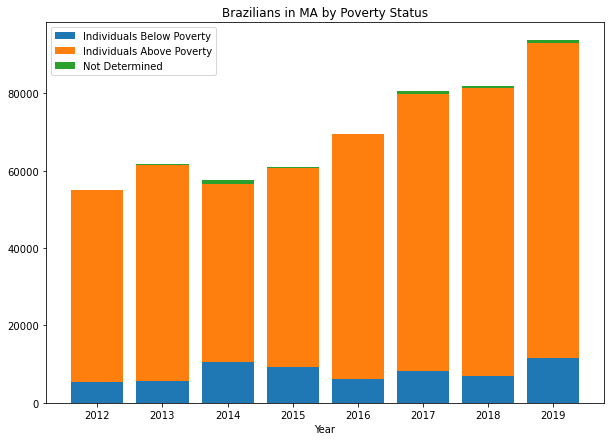

In [5]:
ps_MA_all = np.array(ps_MA_all)
fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(years))
for i in range(end - start + 1):
    values = ps_MA_all[:,i+1]
    ax.bar(years, values, label=labels[i], bottom=bottom)
    bottom += values
ax.set_xlabel('Year')
ax.set_title('Brazilians in MA by Poverty Status')
ax.legend()
plt.savefig(f"{directory}/BR_PS_Mass_since2012.png")
plt.show()

The following stacked bar chart shows the change in poverty status of Brazilians nationwide between 2012-2019.

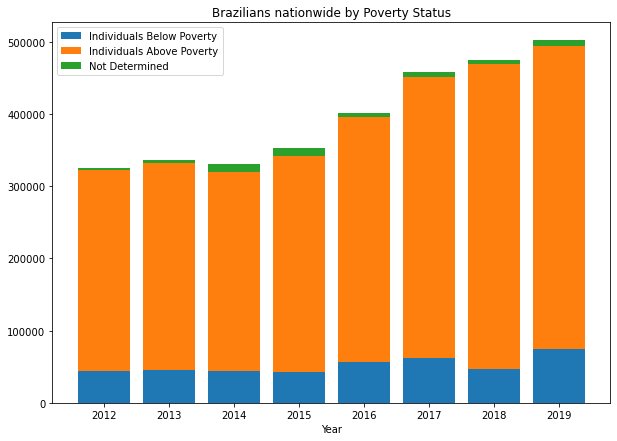

In [7]:
ps_national_all = np.array(ps_national_all)
fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(years))
for i in range(end - start + 1):
    values = ps_national_all[:,i+1]
    ax.bar(years, values, label=labels[i], bottom=bottom)
    bottom += values
ax.set_xlabel('Year')
ax.set_title('Brazilians nationwide by Poverty Status')
ax.legend()
plt.savefig(f"{directory}/BR_PS_national_since2012.png")
plt.show()